In [28]:
#https://realpython.com/logistic-regression-python/

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [30]:
data = pd.read_csv('data.csv',  index_col=0)
data.shape

(887379, 19)

In [31]:
data['loan_condition'].value_counts()

Good Loan    819950
Bad Loan      67429
Name: loan_condition, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['application_type'] = le.fit_transform(data['application_type'])
data['income_category'] = le.fit_transform(data['income_category'])
data['grade'] = le.fit_transform(data['grade'])
data['region'] = le.fit_transform(data['region'])
data['home_ownership'] = le.fit_transform(data['home_ownership'])
data['term'] = le.fit_transform(data['term'])
data['purpose'] = le.fit_transform(data['purpose'])
data['interest_payments'] = le.fit_transform(data['interest_payments'])

data

,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,application_type,purpose,interest_payments,interest_rate,grade,dti,total_pymnt,total_rec_prncp,recoveries,installment,region,loan_condition,duracao_emprestimo_dias
1,10.0,0,1,24000,5000,0,1,0,1,10.65,1,27.65,5861.071414,5000.00,0.00,162.87,3,1,1127
2,0.5,0,1,30000,2500,1,1,5,0,15.27,2,1.00,1008.710000,456.46,117.08,59.83,2,0,487
3,10.0,0,1,12252,2400,0,1,5,0,15.96,2,8.72,3003.653644,2400.00,0.00,84.33,1,1,913
4,10.0,0,1,49200,10000,0,1,2,0,13.49,2,20.00,12226.302210,10000.00,0.00,339.31,4,1,1127
5,1.0,0,1,80000,3000,1,1,2,1,12.69,1,17.94,3242.170000,2233.10,0.00,67.79,4,1,1492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887375,8.0,0,1,31000,10000,0,1,4,1,11.99,1,28.69,3971.880000,2944.53,0.00,332.10,4,1,365
887376,10.0,1,1,79000,24000,0,1,3,1,11.99,1,3.90,9532.390000,7066.74,0.00,797.03,0,1,365
887377,5.0,0,1,35000,13000,1,1,4,0,15.99,3,30.90,3769.740000,1844.50,0.00,316.07,2,1,365
887378,1.0,0,1,64400,12000,1,1,4,0,19.99,4,27.19,3787.670000,1552.69,0.00,317.86,0,1,365


In [ ]:
data['loan_condition'] = le.fit_transform(data['loan_condition'])

In [33]:
data['loan_condition'].value_counts()

1    819950
0     67429
Name: loan_condition, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='loan_condition')
y = data['loan_condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_undersamp = np.concatenate((X_train[y_train == 0], X_train[y_train == 1][:sum(y_train == 0)]))
y_train_undersamp = np.concatenate((y_train[y_train == 0], y_train[y_train == 1][:sum(y_train == 0)]))
X_test_undersamp = np.concatenate((X_test[y_test == 0], X_test[y_test == 1][:sum(y_test == 0)]))
y_test_undersamp = np.concatenate((y_test[y_test == 0], y_test[y_test == 1][:sum(y_test == 0)]))

C:\Users\davia\AppData\Local\Temp\ipykernel_18196\1676992334.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_undersamp = np.concatenate((y_train[y_train == 0], y_train[y_train == 1][:sum(y_train == 0)]))
C:\Users\davia\AppData\Local\Temp\ipykernel_18196\1676992334.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test_undersamp = np.concatenate((y_test[y_test == 0], y_test[y_test == 1][:sum(y_test == 0)]))


In [35]:
pd.DataFrame(y_train_undersamp).value_counts()


0    53943
1    53943
dtype: int64

In [36]:
pd.DataFrame(y_test_undersamp).value_counts()

0    13486
1    13486
dtype: int64

## Modelos

In [37]:
#https://mariofilho.com/precisao-recall-e-f1-score-em-machine-learning/#:~:text=A%20precis%C3%A3o%20mede%20a%20quantidade,e%20recall%20de%20maneira%20equilibrada.

In [38]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

model_undersamp = LogisticRegression(solver='liblinear', random_state=0)
model_undersamp .fit(X_train_undersamp, y_train_undersamp)

LogisticRegression(random_state=0, solver='liblinear')

## Resultados

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Modelo com os dados de treino balanceados e os de teste balanceados

In [40]:
#p_pred_unbalanced = model_unbalanced.predict_proba(X_test)
y_pred = model_undersamp.predict(X_test_undersamp)
score = model_undersamp.score(X_test_undersamp, y_test_undersamp)
conf_m = confusion_matrix(y_test_undersamp, y_pred)
report = classification_report(y_test_undersamp, y_pred)

In [41]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.66      0.72     13486
           1       0.71      0.83      0.77     13486

    accuracy                           0.75     26972
   macro avg       0.75      0.75      0.74     26972
weighted avg       0.75      0.75      0.74     26972



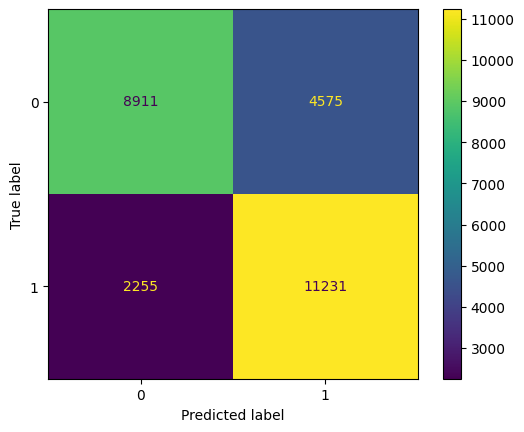

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=[0,1])
disp.plot()
plt.show()

### Modelo com os dados de treino balanceados e os de teste desbalanceados

In [43]:
#p_pred_unbalanced = model_unbalanced.predict_proba(X_test)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [44]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.34      0.51     13486
           1       0.95      1.00      0.97    163990

    accuracy                           0.95    177476
   macro avg       0.95      0.67      0.74    177476
weighted avg       0.95      0.95      0.94    177476



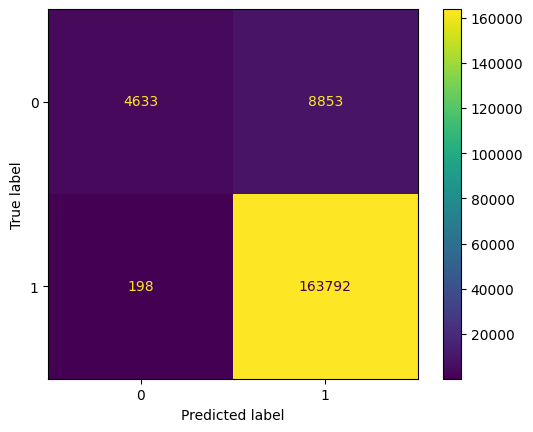

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=[0,1])
disp.plot()
plt.show()

### Modelo com os dados de treino desbalanceados e os de teste balanceados

In [46]:
#p_pred_unbalanced = model_unbalanced.predict_proba(X_test)
y_pred = model.predict(X_test_undersamp)
score = model.score(X_test_undersamp, y_test_undersamp)
conf_m = confusion_matrix(y_test_undersamp, y_pred)
report = classification_report(y_test_undersamp, y_pred)

c:\Users\davia\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\davia\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.34      0.51     13486
           1       0.60      1.00      0.75     13486

    accuracy                           0.67     26972
   macro avg       0.80      0.67      0.63     26972
weighted avg       0.80      0.67      0.63     26972



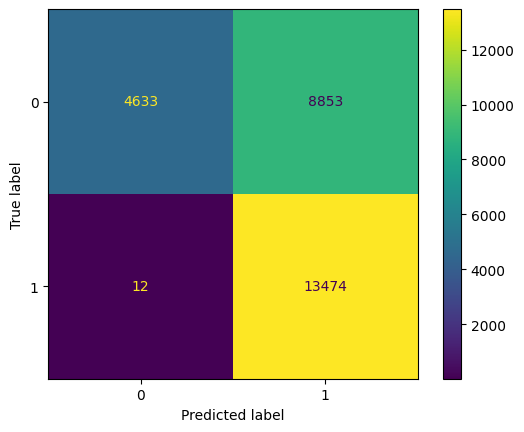

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=[0,1])
disp.plot()
plt.show()

### Modelo com os dados de treino desbalanceados e os de teste desbalanceado

In [49]:
#p_pred_unbalanced = model_unbalanced.predict_proba(X_test)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [50]:
print(report)

              precision    recall  f1-score   support

           0       0.96      0.34      0.51     13486
           1       0.95      1.00      0.97    163990

    accuracy                           0.95    177476
   macro avg       0.95      0.67      0.74    177476
weighted avg       0.95      0.95      0.94    177476



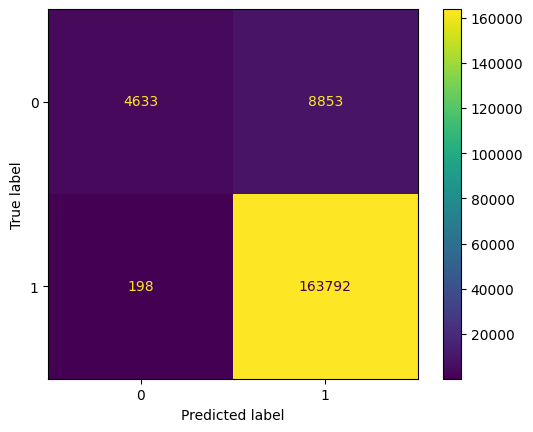

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=[0,1])
disp.plot()
plt.show()

In [52]:
# matriz de confusão tanto pra treino quanto pra teste - Feito
# ajustar a rede neural pra dados balanceados e desbalanceados - Feito
# melhor interpretação na hora do balanceamento dos dados
# seleção das variáveis

In [53]:
#podemos fazer uma matriz de correlação entre as covariáveis;
#fazer um gráfico roc: https://www.kaggle.com/code/possiblemanjr/imbalanced-data-metric-roc-auc-or-pr-auc

In [54]:
data['loan_condition'].value_counts()

1    819950
0     67429
Name: loan_condition, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

sm = SMOTE(random_state = 2)
nr = NearMiss()

X_train_oversamp, y_train_oversamp = sm.fit_resample(X_train, y_train.ravel())
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

In [77]:
X_test_oversamp, y_test_oversamp = sm.fit_resample(X_test, y_test.ravel())
X_test_miss, y_test_miss = nr.fit_resample(X_test, y_test.ravel())

In [78]:
print("Normal, counts of label '1': {}".format(sum(y_train == 1)))
print("Normal, counts of label '0': {}".format(sum(y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_oversamp == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_oversamp == 0)))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Normal, counts of label '1': 655960
Normal, counts of label '0': 53943
After OverSampling, counts of label '1': 655960
After OverSampling, counts of label '0': 655960
After Undersampling, counts of label '1': 53943
After Undersampling, counts of label '0': 53943


In [72]:
model_oversamp = LogisticRegression()
model_undesamp = LogisticRegression()
model = LogisticRegression()

model_oversamp.fit(X_train_oversamp, y_train_oversamp.ravel())
model_undesamp.fit(X_train_undersamp, y_train_undersamp.ravel())
model.fit(X_train, y_train.ravel())

c:\Users\davia\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\davia\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

LogisticRegression()

In [ ]:
#entender melhor as medidas x
#ver qual melhor medida pra avaliar o modelo(f1-score do 0) x
#ver qual melhor metodologia para avaliar os dados de teste x
#quando sofre de undersampling/oversampling, deve-se testar ?
#nos dados normais ou a base de teste deve sofre algum procedimento? x
#seleção de variáveis
#ver curva roc

In [ ]:
#acurácia 